In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../DataOut.csv')

In [3]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,67
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,70
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,59
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,40
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,43


In [4]:
import pandas as pd
import plotly.express as px


# Calculer l'âge des clients
#df['Age'] = 2024 - df['Year_Birth']

# Créer un histogramme interactif avec Plotly
fig = px.histogram(df, x='Age', nbins=20, title='Distribution des âges des clients',
                   labels={'Age': 'Âge'}, 
                   color_discrete_sequence=['skyblue'])

# Afficher le graphique
fig.show()


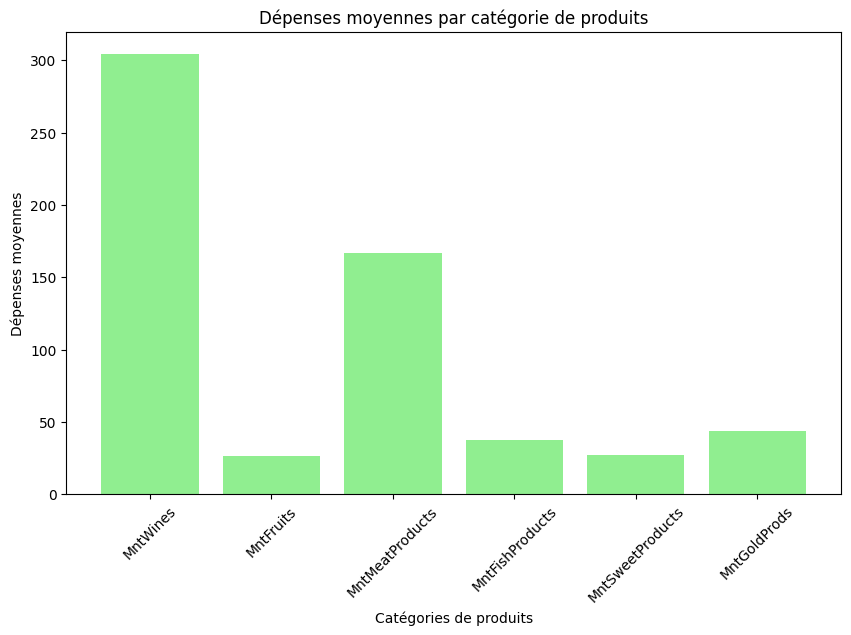

In [5]:
# Dépenses moyennes dans chaque catégorie de produits
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
moyennes = df[categories].mean()
import matplotlib.pyplot as plt

# Créer un diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(categories, moyennes, color='lightgreen')
plt.title('Dépenses moyennes par catégorie de produits')
plt.xlabel('Catégories de produits')
plt.ylabel('Dépenses moyennes')
plt.xticks(rotation=45)
plt.show()

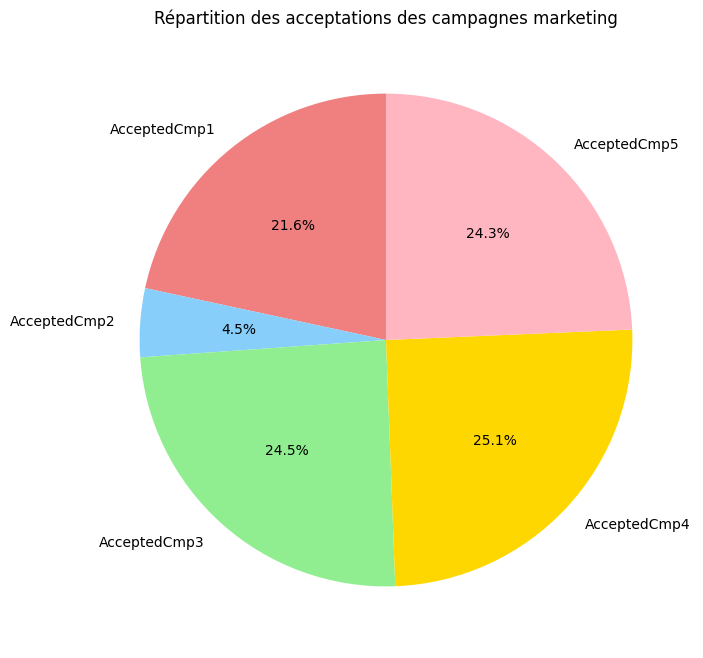

In [6]:
# Somme des clients ayant accepté chaque campagne
campagnes = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptations = df[campagnes].sum()

# Créer un graphique en secteurs
plt.figure(figsize=(8, 8))
plt.pie(acceptations, labels=campagnes, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightpink'])
plt.title('Répartition des acceptations des campagnes marketing')
plt.show()

                MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Has_Children                                                            
Avec enfants  231.321451  15.943089        85.185741        22.012508   
Sans enfants  486.885400  52.213501       372.312402        76.503925   

              MntSweetProducts  MntGoldProds  
Has_Children                                  
Avec enfants         16.737336     36.049406  
Sans enfants         53.043956     63.897959  


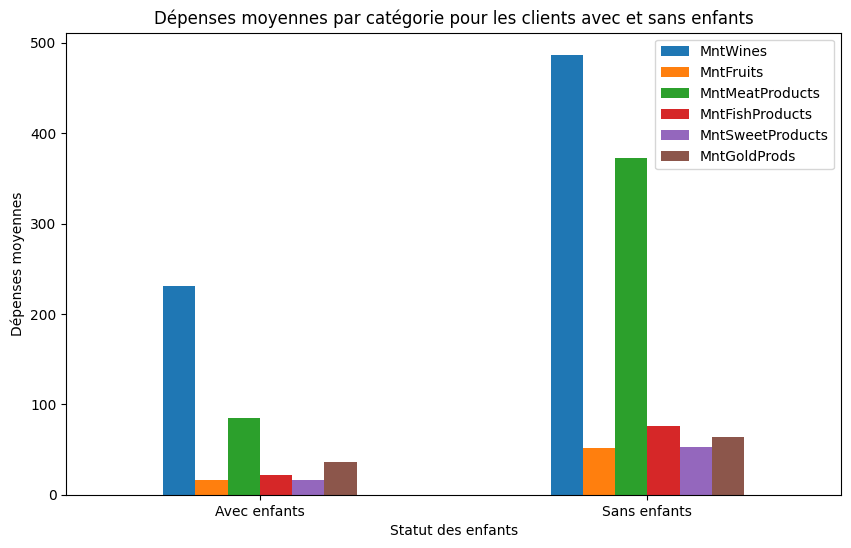

In [7]:
# Créer une nouvelle colonne pour indiquer si le client a des enfants
df['Has_Children'] = df['Kidhome'] + df['Teenhome']
df['Has_Children'] = df['Has_Children'].apply(lambda x: 'Avec enfants' if x > 0 else 'Sans enfants')

# Comparer les dépenses moyennes pour ceux avec et sans enfants
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

depenses_moyennes = df.groupby('Has_Children')[categories].mean()

# Afficher les résultats
print(depenses_moyennes)

# Visualiser les résultats avec un diagramme en barres
depenses_moyennes.plot(kind='bar', figsize=(10, 6))
plt.title('Dépenses moyennes par catégorie pour les clients avec et sans enfants')
plt.xlabel('Statut des enfants')
plt.ylabel('Dépenses moyennes')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

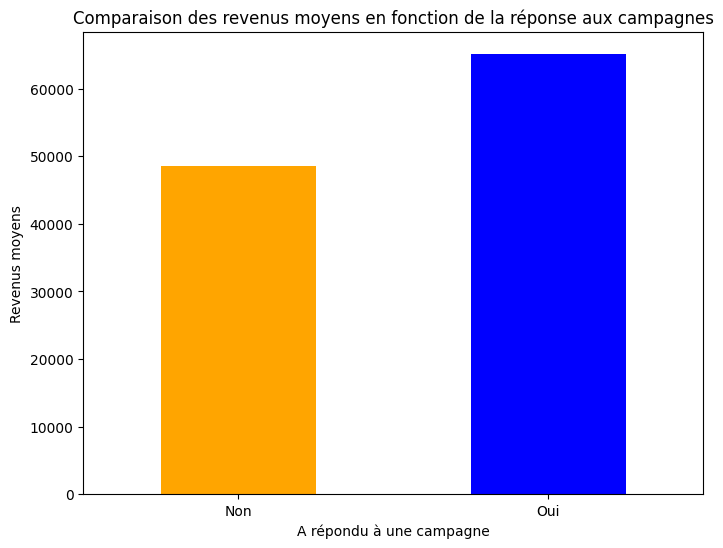

In [8]:
# Créer une colonne binaire indiquant si le client a répondu à une campagne (au moins une acceptée)
df['Has_Responded'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) > 0

# Comparer les revenus moyens entre ceux qui ont répondu et ceux qui n'ont pas répondu
revenus_moyens = df.groupby('Has_Responded')['Income'].mean()

# Visualiser avec un diagramme en barres
plt.figure(figsize=(8, 6))
revenus_moyens.plot(kind='bar', color=['orange', 'blue'])
plt.title('Comparaison des revenus moyens en fonction de la réponse aux campagnes')
plt.xlabel('A répondu à une campagne')
plt.ylabel('Revenus moyens')
plt.xticks([0, 1], ['Non', 'Oui'], rotation=0)
plt.show()


In [9]:
# Calculer les dépenses totales pour chaque client
df['Total_Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


Il est important d'attendre d'avoir des cluster ici et de supp les donéee abérante pour un better scatter plot

In [10]:
import pandas as pd
import plotly.express as px

# Calculer les dépenses totales pour chaque client
df['Total_Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Créer un scatter plot interactif avec clusters par 'Education'
fig = px.scatter(df, x='Income', y='Total_Expenses', title='Relation entre les revenus et les dépenses totales des clients',
                 labels={'Income': 'Revenus', 'Total_Expenses': 'Dépenses totales'},
                 hover_data=['Education', 'Marital_Status'],
                 color='Education')  # Ajouter la couleur par le niveau d'éducation

# Afficher le graphique
fig.show()


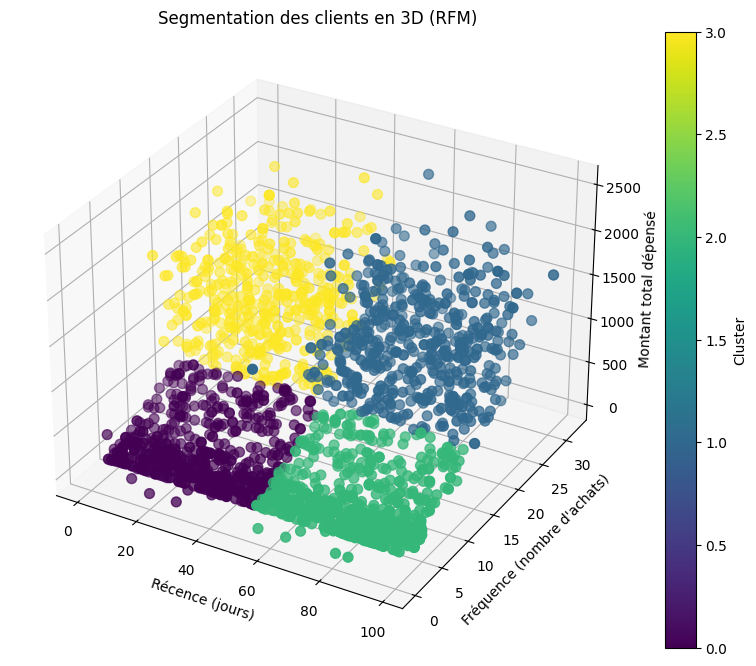

,Recency,Frequency,Monetary,Cluster
0,58,22,1617,1
1,38,4,27,0
2,26,20,776,3
3,26,6,53,0
4,94,14,422,2


In [11]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Chargement des données (vous devrez adapter ce chemin à votre propre fichier CSV)
data = pd.read_csv('../DataOut.csv')

# Création des colonnes RFM
rfm_data = pd.DataFrame()

# Récence (Recency) : déjà présente dans les données
rfm_data['Recency'] = data['Recency']

# Fréquence (Frequency) : somme des différents types d'achats
rfm_data['Frequency'] = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Montant (Monetary) : somme des montants dépensés dans les différentes catégories de produits
rfm_data['Monetary'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Normalisation des données RFM pour le clustering
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_data)

# Application du clustering K-means avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Visualisation 3D des clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Création du scatter plot 3D avec Recency, Frequency, Monetary et les clusters
scatter = ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['Monetary'], 
                     c=rfm_data['Cluster'], cmap='viridis', s=50)

# Ajout des labels aux axes
ax.set_xlabel('Récence (jours)')
ax.set_ylabel('Fréquence (nombre d\'achats)')
ax.set_zlabel('Montant total dépensé')

# Ajout d'une légende pour les clusters
fig.colorbar(scatter, ax=ax, label='Cluster')

plt.title('Segmentation des clients en 3D (RFM)')
plt.show()

# Affichage des premiers résultats de la segmentation RFM avec les clusters
rfm_data.head()


In [12]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

# Chargement des données (vous devrez adapter ce chemin à votre propre fichier CSV)
data = pd.read_csv('../DataOut.csv')


# Création des colonnes RFM
rfm_data = pd.DataFrame()

# Récence (Recency) : déjà présente dans les données
rfm_data['Recency'] = data['Recency']

# Fréquence (Frequency) : somme des différents types d'achats
rfm_data['Frequency'] = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Montant (Monetary) : somme des montants dépensés dans les différentes catégories de produits
rfm_data['Monetary'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Normalisation des données RFM pour le clustering
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_data)

# Application du clustering K-means avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Création du graphique interactif en 3D avec Plotly
fig = px.scatter_3d(
    rfm_data, 
    x='Recency', 
    y='Frequency', 
    z='Monetary', 
    color='Cluster',
    title='Segmentation des clients en 3D (RFM)',
    labels={'Recency': 'Récence', 'Frequency': 'Fréquence', 'Monetary': 'Montant dépensé'},
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.update_traces(marker=dict(size=4))  # Vous pouvez ajuster cette valeur pour changer la taille des points

# Affichage du graphique interactif
fig.show()

# Affichage des premiers résultats de la segmentation RFM avec les clusters
rfm_data.head()


,Recency,Frequency,Monetary,Cluster
0,58,22,1617,1
1,38,4,27,0
2,26,20,776,3
3,26,6,53,0
4,94,14,422,2


In [13]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
from plotly.subplots import make_subplots
from PIL import Image
import plotly.graph_objects as go
import os
import numpy as np

# Fonction pour créer un répertoire temporaire pour stocker les images
output_dir = "3d_frames"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Chargement des données (vous devrez adapter ce chemin à votre propre fichier CSV)
data = pd.read_csv('../DataOut.csv')

# Création des colonnes RFM
rfm_data = pd.DataFrame()
rfm_data['Recency'] = data['Recency']
rfm_data['Frequency'] = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
rfm_data['Monetary'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Normalisation des données RFM pour le clustering
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_data)

# Application du clustering K-means avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Création du graphique initial
fig = px.scatter_3d(rfm_data, x='Recency', y='Frequency', z='Monetary', color='Cluster',
                    title='Segmentation des clients en 3D (RFM)', labels={'Recency': 'Récence', 'Frequency': 'Fréquence', 'Monetary': 'Montant dépensé'},
                    color_continuous_scale=px.colors.sequential.Viridis)

# Ajuster la taille des points
fig.update_traces(marker=dict(size=4))

# Sauvegarde des images à différents angles
frames = 400  # Nombre de frames pour la rotation
for i in range(frames):
    # Calcul de l'angle de la caméra
    angle = i * (360 / frames)
    fig.update_layout(scene_camera=dict(eye=dict(x=2 * np.sin(np.radians(angle)), y=2 * np.cos(np.radians(angle)), z=0.5)))
    
    # Sauvegarde chaque image
    file_path = os.path.join(output_dir, f"frame_{i}.png")
    fig.write_image(file_path)

# Création du GIF à partir des frames
frames = [Image.open(os.path.join(output_dir, f"frame_{i}.png")) for i in range(frames)]
gif_path = "3d_rotation.gif"
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=20, loop=0)

print(f"GIF saved at {gif_path}")

GIF saved at 3d_rotation.gif


In [14]:
#import pandas as pd
#import plotly.express as px
#
#rfm_data['Income'] = data['Income']
#
## Créer un scatter plot interactif avec clusters par 'Education'
#fig = px.scatter(rfm_data, x='Income', y='Monetary', title='Relation entre les revenus et les dépenses totales des clients',
#                 labels={'Income': 'Revenus', 'Monetary': 'Dépenses totales'},
#                 color='Cluster')  # Ajouter la couleur par le niveau d'éducation
#
## Afficher le graphique
#fig.show()
